## TO SEE THE OUTPUT PLEASE JUST RESTART AND RUN ALL THE CELLS.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [92]:

def readfile(filepath):
    data= pd.read_csv(filepath,delimiter=",")
    return len(data)

data= pd.read_csv(r"C:\Users\hites\Downloads\education-2010-federal-stem-inventory\education-2010-federal-stem-inventory\data\2010_federal_stem_education_inventory_data_set.csv",delimiter=",")

In [93]:
data.head(2)


,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_im,column_in,column_io,column_ip,column_iq,column_ir,column_is,column_it,column_iu,column_iv
0,PRG_0043,CP4SMP - Competitive Program for Science Museu...,NASA,Education Office,The Competitive Program for Science Museums an...,2008.0,7.8,7.0,7.0,General STEM,...,NaN,False,INDEPENDENT,INTERNAL,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,INTERNAL
1,PRG_0044,NIEO - NASA Informal Education Opportunities,NASA,Education Office,The NASA Informal Education Opportunities (NIE...,2010.0,0.0,0.0,2.0,General STEM,...,NaN,False,INDEPENDENT,NaN,NaN,NaN,NaN,False,NaN,NaN


In [94]:
data.describe()

,column_f,column_g,column_h,column_i,column_ey,column_ff,column_fh,column_fk,column_fn,column_fq,column_fw,column_fz,column_gc
count,203.000000,192.000000,205.000000,214.000000,0.0,0.0,8.000000,3.000000,1.0000,1.000,2.000000,1.00,1.000
mean,1998.300493,24.377105,26.863382,27.061986,NaN,NaN,1.471916,0.398167,0.0445,0.089,0.887000,1.82,2.204
std,11.904877,203.300325,236.114042,236.084450,NaN,NaN,1.928210,0.607812,NaN,NaN,1.112986,NaN,NaN
min,1914.000000,0.000000,0.000000,0.000000,NaN,NaN,0.070000,0.044500,0.0445,0.089,0.100000,1.82,2.204
25%,1993.000000,0.563500,0.700000,0.750000,NaN,NaN,0.198375,0.047250,0.0445,0.089,0.493500,1.82,2.204
50%,2001.000000,1.613252,1.763000,2.003000,NaN,NaN,0.625000,0.050000,0.0445,0.089,0.887000,1.82,2.204
75%,2007.000000,5.800000,6.327000,6.460009,NaN,NaN,1.825458,0.575000,0.0445,0.089,1.280500,1.82,2.204
max,2010.000000,2796.835667,3354.390546,3425.286526,NaN,NaN,5.000000,1.100000,0.0445,0.089,1.674000,1.82,2.204


In [95]:
data

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_im,column_in,column_io,column_ip,column_iq,column_ir,column_is,column_it,column_iu,column_iv
0,PRG_0043,CP4SMP - Competitive Program for Science Museu...,NASA,Education Office,The Competitive Program for Science Museums an...,2008.0,7.800000,7.000000,7.000000,General STEM,...,NaN,False,INDEPENDENT,INTERNAL,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,INTERNAL
1,PRG_0044,NIEO - NASA Informal Education Opportunities,NASA,Education Office,The NASA Informal Education Opportunities (NIE...,2010.0,0.000000,0.000000,2.000000,General STEM,...,NaN,False,INDEPENDENT,NaN,NaN,NaN,NaN,False,NaN,NaN
2,PRG_0045,Aeronautics Scholarship,NASA,ARMD,Fostering new generations of highly skilled sc...,2007.0,1.800000,1.800000,1.800000,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRG_0046,Innovation in Aeronautics Instruction Competition,NASA,ARMD,ARMD uses NASA Research Announcements (NRAs) t...,2007.0,1.100000,1.100000,1.100000,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRG_0047,K-12 Competitive Grants Opportunity,NASA,Center GSFC,The K-12 Cooperative Agreement Notice (CAN) is...,2008.0,11.600000,13.000000,3.700000,General STEM,...,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
5,PRG_0048,HST,NASA,Science Mission Directorate (SMD),The Hubble Education Program uses Hubble disco...,1995.0,1.420000,1.347000,1.250000,General STEM,...,NaN,NaN,INDEPENDENT,INTERNAL,NaN,INDEPENDENT,INTERNAL,NaN,INDEPENDENT,NaN
6,PRG_0049,NSTI-MI - NASA Science and Technology Institut...,NASA,Education Office,The NSTI provides an opportunity for MI scient...,2006.0,2.000000,1.961000,2.461000,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PRG_0050,JPFP - Jenkins Pre-Doctoral Fellowship Program,NASA,Education Office,The NASA Harriett G. Jenkins Pre-doctoral Fell...,2001.0,2.564000,2.525000,2.625000,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PRG_0051,USRP - Undergraduate Student Research Project,NASA,Education Office,USRP offers undergraduates across the United S...,2001.0,3.995000,3.480000,2.974967,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PRG_0052,21st Century Explorer,NASA,ESMD,A series of space exploration educational mate...,2004.0,0.300000,0.300000,0.300000,General STEM,...,INTERNAL,NaN,NaN,INTERNAL,NaN,NaN,NaN,False,NaN,INTERNAL


In [96]:
data=data[pd.notnull(data["column_g"])]

In [97]:
#making a np array of growth percentage

value = ((data["column_h"] - data["column_g"]) / data["column_g"])* 100

In [98]:
#if last years percetage was 0 it would give Nan value so to correct it, written the following command

target_tag = np.where( data["column_g"] ==0, data["column_h"]*100, value )
print(target_tag[:10])

[-10.25641026   0.           0.           0.          12.06896552
  -5.14084507  -1.95        -1.52106084 -12.89111389   0.        ]


In [99]:
#making negative growth to be 0 and positive to be 1

target_tag= np.where( target_tag <= 0, 0,1)

In [100]:
data["target"]= target_tag

C:\Users\hites\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


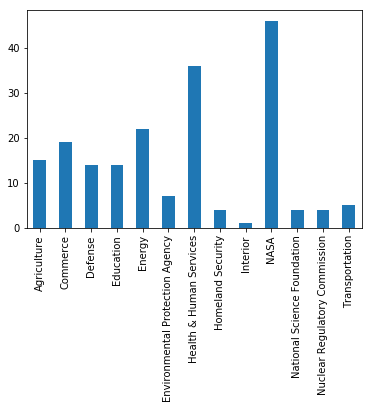

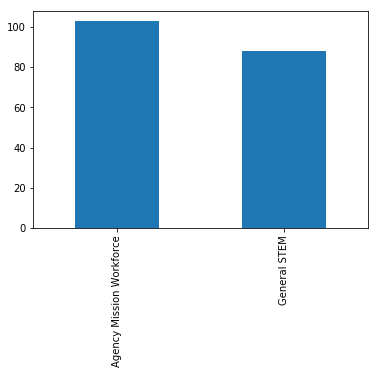

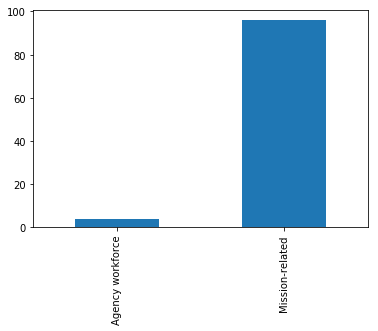

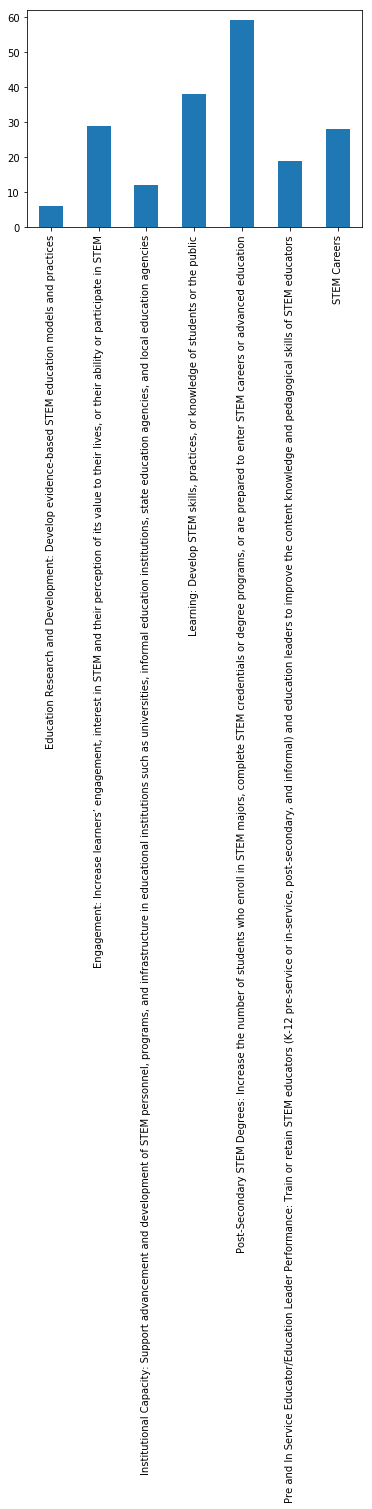

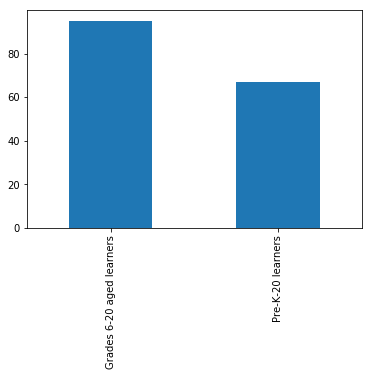

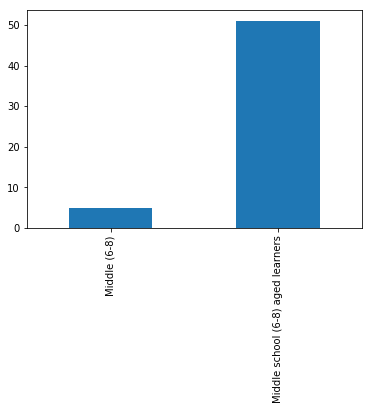

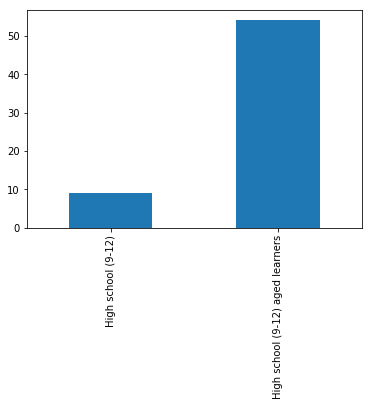

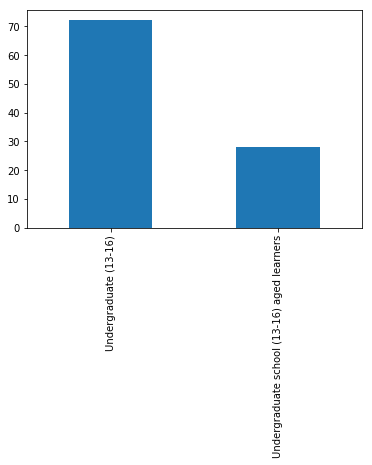

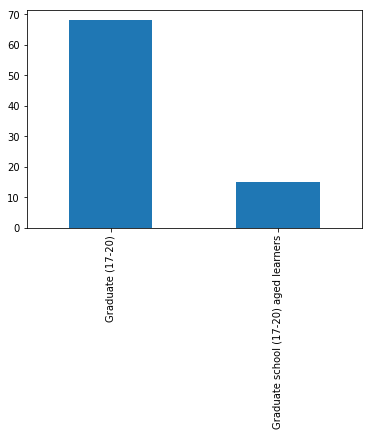

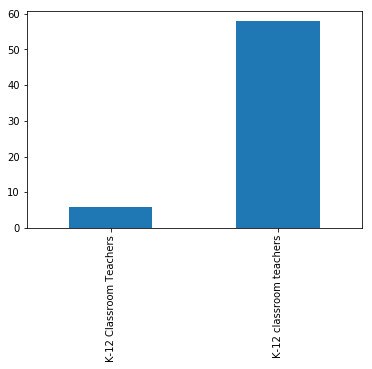

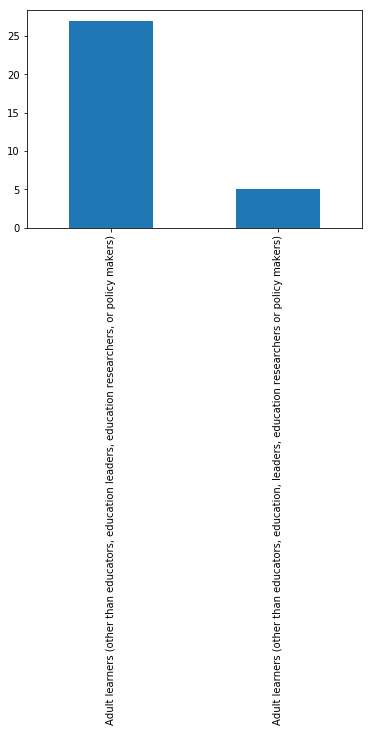

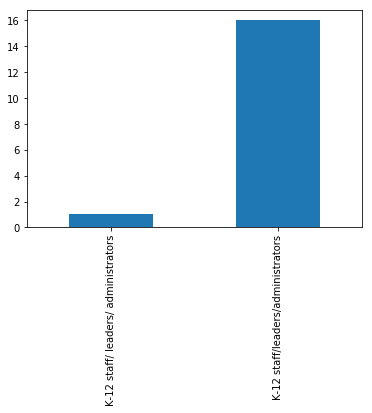

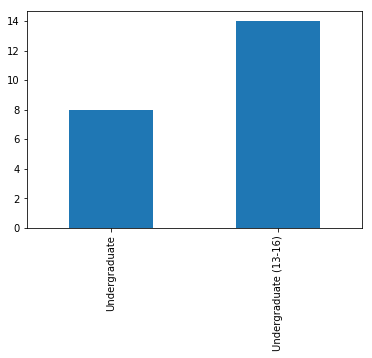

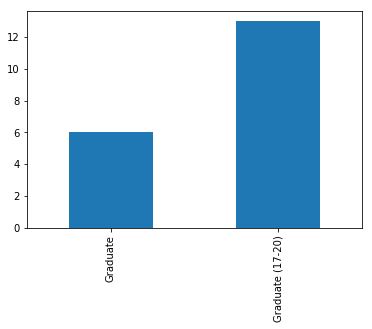

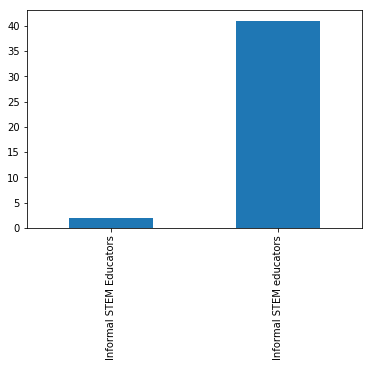

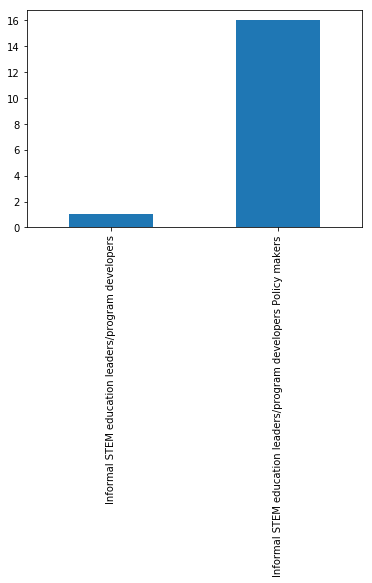

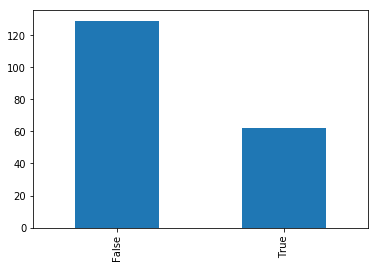

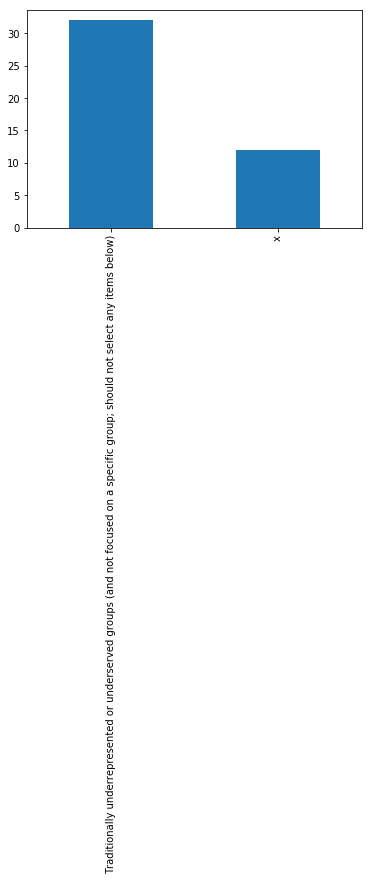

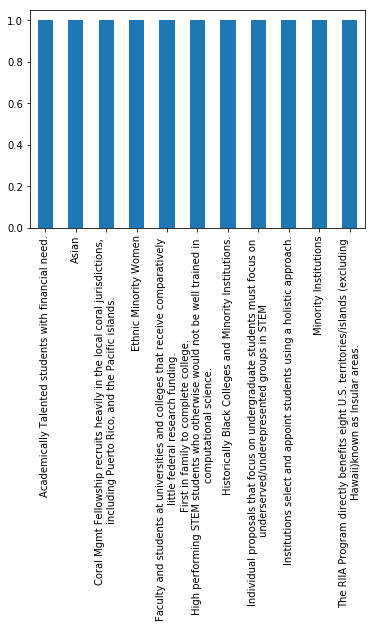

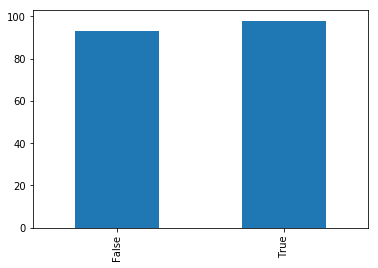

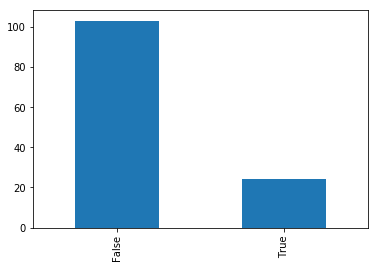

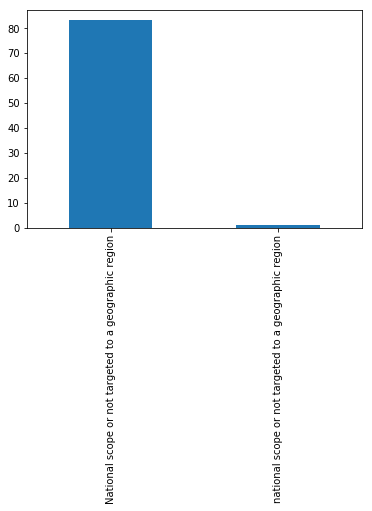

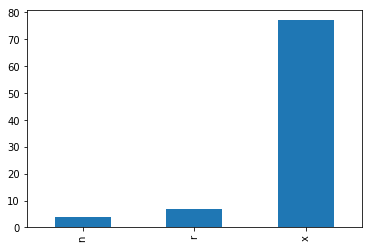

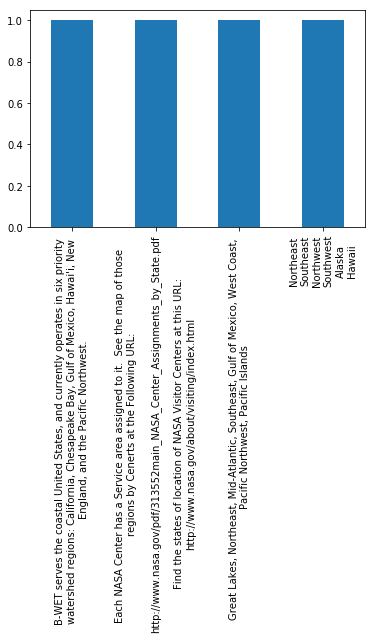

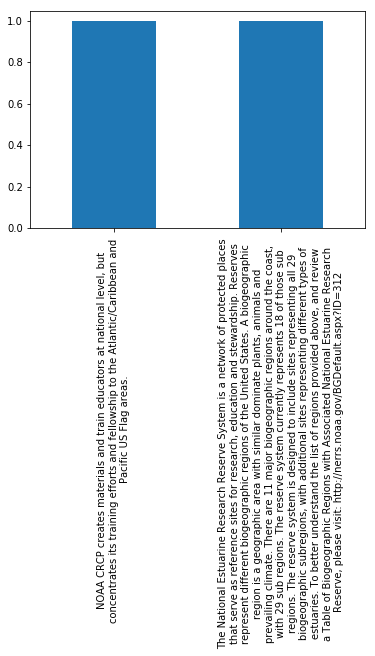

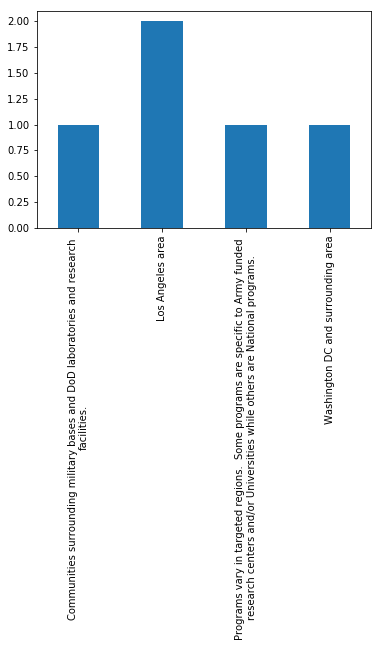

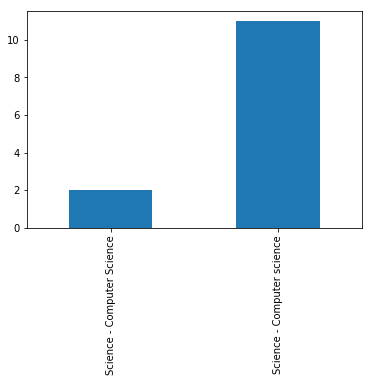

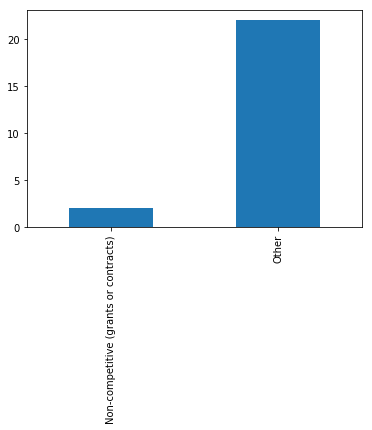

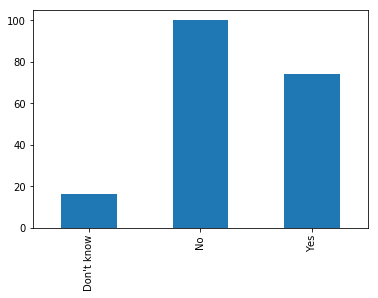

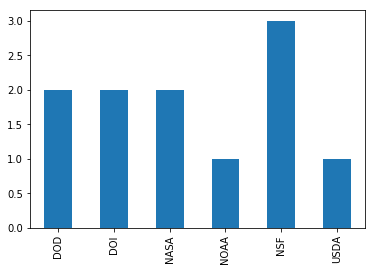

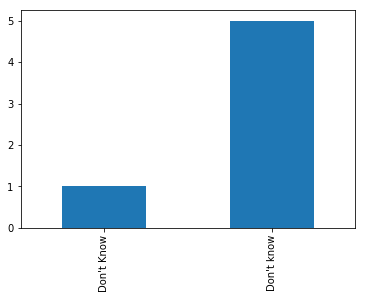

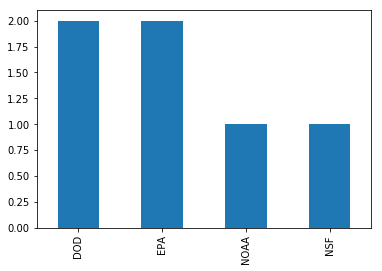

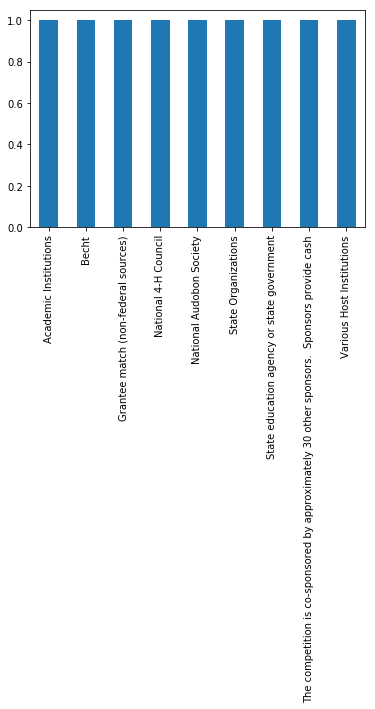

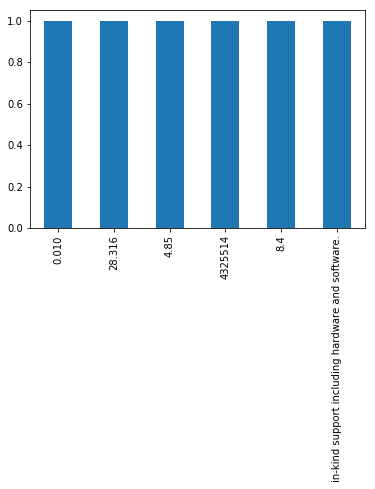

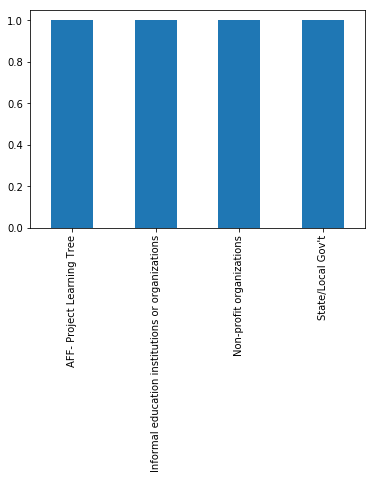

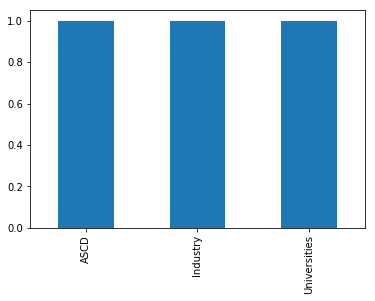

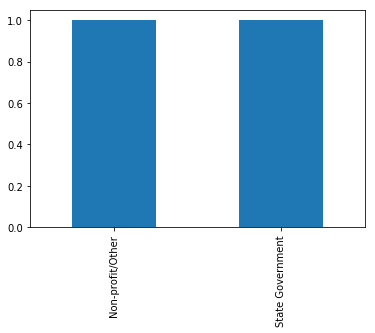

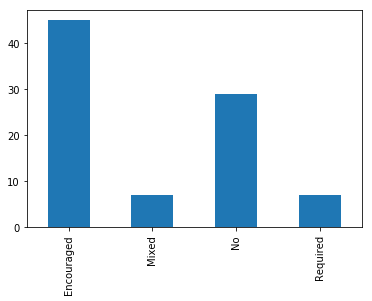

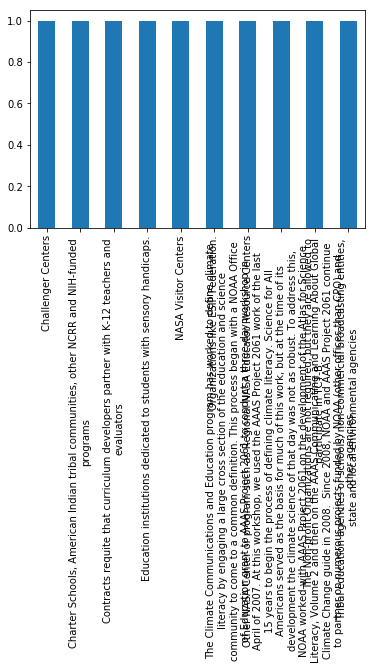

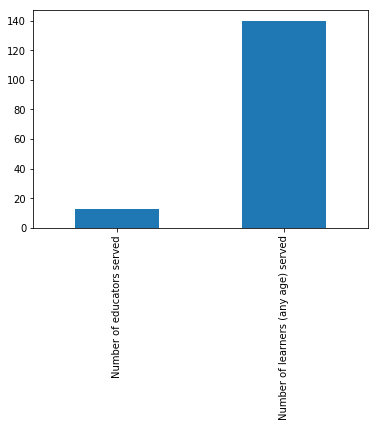

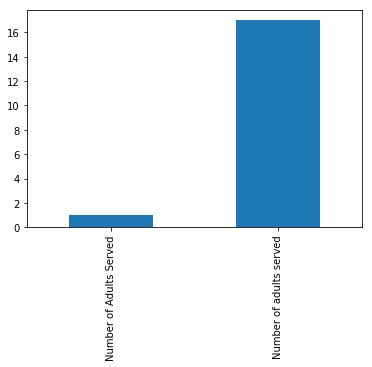

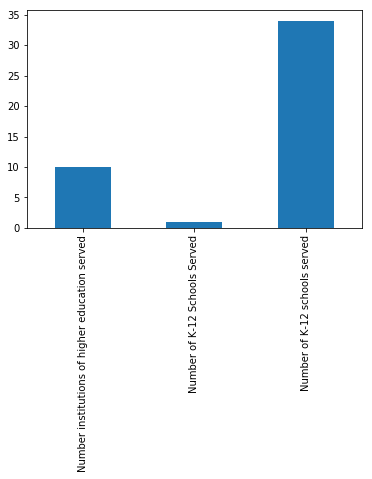

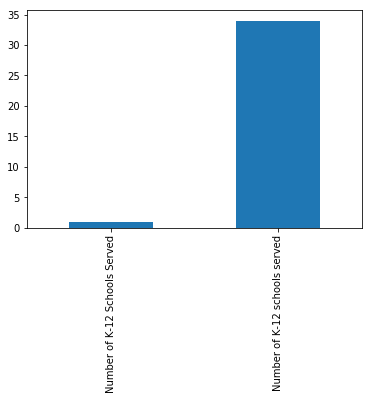

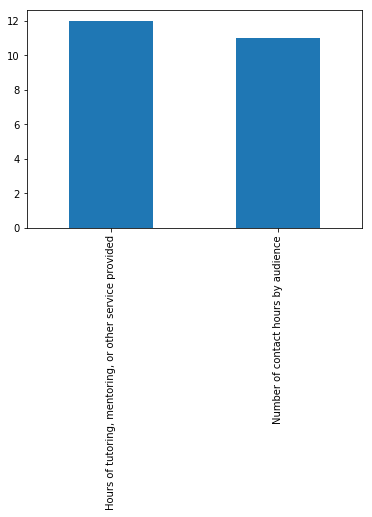

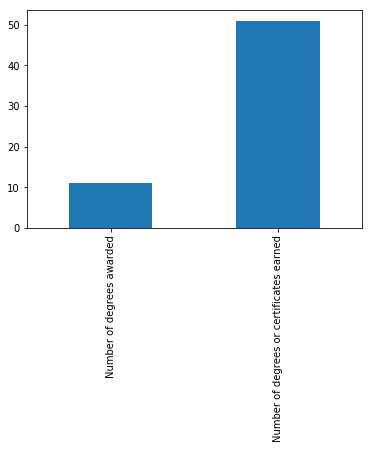

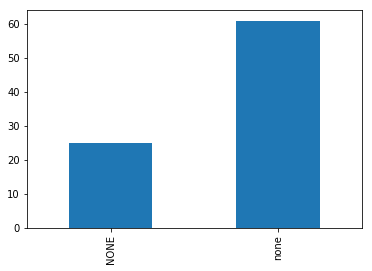

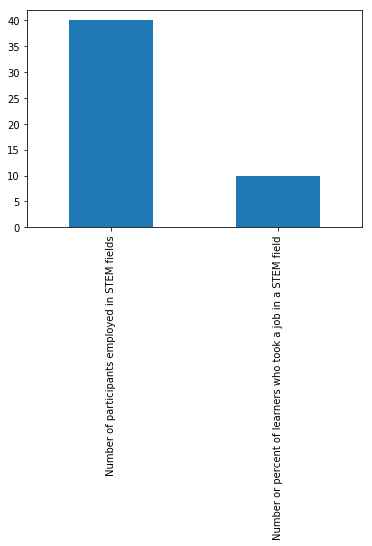

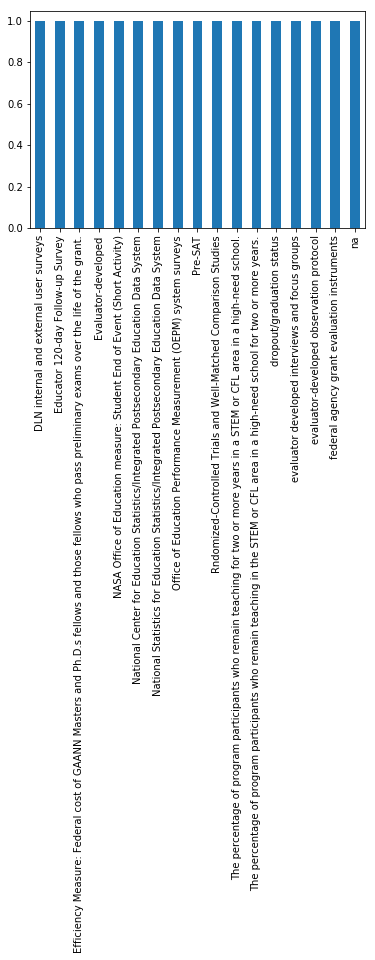

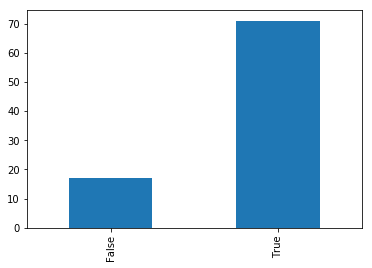

In [101]:
#by increasing the range we can have all of the data plotted
count=0
plot_no=0

while count < 256:
    
    #ignoring FY2008, FY2009, FY2010 while plotting graphs
    
    if len(set(data[data.columns[count]])) >20 or  len(set(data[data.columns[count]])) <=2 :
        count+=1
        continue

    
    try:
        data[data.columns[count]].value_counts().sort_index().plot.bar()
        plt.show()
    except:
        print("j")
    count+=1
    plot_no+=1

#please scroll down to look at the various plots   

In [102]:
#rmoving columns which have more than 5% nan values 

for col in data.columns:
    if pd.isnull(data[col]).sum() / len(data) > 0.5:
        del data[col]

In [103]:
data.shape

(192, 27)

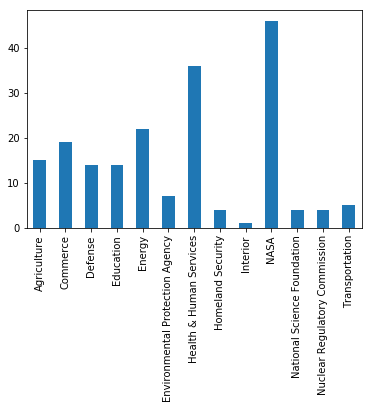

In [104]:
data['column_c'].value_counts().sort_index().plot.bar()
plt.show()


In [105]:
set(data['column_c'])

{nan,
 'Defense',
 'Transportation',
 'Agriculture',
 'Nuclear Regulatory Commission',
 'NASA',
 'Environmental Protection Agency',
 'Education',
 'Energy',
 'Homeland Security',
 'National Science Foundation',
 'Commerce',
 'Interior',
 'Health & Human Services'}

In [106]:

data.describe(include="all")

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_bj,column_cp,column_de,column_di,column_ek,column_el,column_fe,column_hc,column_hd,target
count,191,191,191,177,191,185.000000,192.000000,192.000000,192.000000,191,...,100,191,191,127,129,129,190,153,142,192.000000
unique,191,191,13,51,191,NaN,NaN,NaN,NaN,2,...,2,2,2,2,1,125,3,2,1,NaN
top,PRG_0108,High School Longitudinal Study of 2009,NASA,Education Office,The program supports graduate students prepari...,NaN,NaN,NaN,NaN,Agency Mission Workforce,...,Undergraduate (13-16),False,True,False,Other,"Physics, engineering, computer sciences relate...",No,Number of learners (any age) served,Number of learners (any age) served,NaN
freq,1,1,46,18,1,NaN,NaN,NaN,NaN,103,...,72,129,98,103,129,2,100,140,142,NaN
mean,NaN,NaN,NaN,NaN,NaN,1997.567568,24.377105,28.616901,29.409846,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567708
std,NaN,NaN,NaN,NaN,NaN,11.986271,203.300325,243.917029,249.081924,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496690
min,NaN,NaN,NaN,NaN,NaN,1914.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1993.000000,0.563500,0.744500,0.833750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,2001.000000,1.613252,1.879000,2.331500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,2006.000000,5.800000,6.850000,6.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [107]:
#deleting first columnn because there was relevance considering it as there were more like indices
del data["column_a"]


#making a numpy array of top values in each column
top_values = np.array(data.describe(include="all"))

In [108]:
top_values[2,:]

array(['High School Longitudinal Study of 2009', 'NASA',
       'Education Office',
       'The program supports graduate students preparing for research careers in the biomedical, behavioral and social sciences. The awards are made to the graduate students in research doctorate programs, based on the excellence of the science proposed and on the potential of the applicant and proposed training plan. The awards provide for a stipend to offset the cost of living, a portion of health insurance costs, tuition relief, and a modest sum for training related expenses.',
       nan, nan, nan, nan, 'Agency Mission Workforce', 'Mission-related',
       'Post-Secondary STEM Degrees: Increase the number of students who enroll in STEM majors, complete STEM credentials or degree programs, or are prepared to enter STEM careers or advanced education',
       'Learning: Develop STEM skills, practices, or knowledge of students or the public',
       'Instructional material development',
       'Engageme

In [109]:
for i in range(len(data.columns)):
    data[data.columns[i]].fillna(top_values[2,i],inplace=True)

C:\Users\hites\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [110]:

data["column_f"].fillna(data["column_f"].mean(),inplace=True)
for i in range(len(data.columns)):
    print(pd.isnull(data[data.columns[i]]).sum())

#all zeros here indicate that there are no null values in the data frame

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


C:\Users\hites\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [111]:
data.describe(include="all")

,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,...,column_bj,column_cp,column_de,column_di,column_ek,column_el,column_fe,column_hc,column_hd,target
count,192,192,192,192,192.000000,192.000000,192.000000,192.000000,192,192,...,192,192,192,192,192,192,192,192,192,192.000000
unique,191,13,51,191,NaN,NaN,NaN,NaN,2,2,...,2,2,2,2,1,125,3,2,1,NaN
top,High School Longitudinal Study of 2009,NASA,Education Office,The program supports graduate students prepari...,NaN,NaN,NaN,NaN,Agency Mission Workforce,Mission-related,...,Undergraduate (13-16),False,True,False,Other,"Physics, engineering, computer sciences relate...",No,Number of learners (any age) served,Number of learners (any age) served,NaN
freq,2,47,33,2,NaN,NaN,NaN,NaN,104,188,...,164,130,99,168,192,65,102,179,192,NaN
mean,NaN,NaN,NaN,NaN,1997.567568,24.377105,28.616901,29.409846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567708
std,NaN,NaN,NaN,NaN,11.764577,203.300325,243.917029,249.081924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496690
min,NaN,NaN,NaN,NaN,1914.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1993.000000,0.563500,0.744500,0.833750,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,2000.500000,1.613252,1.879000,2.331500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,2006.000000,5.800000,6.850000,6.600000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [112]:
data.dropna(inplace=True)

C:\Users\hites\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
data.describe(include="all")

,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,...,column_bj,column_cp,column_de,column_di,column_ek,column_el,column_fe,column_hc,column_hd,target
count,192,192,192,192,192.000000,192.000000,192.000000,192.000000,192,192,...,192,192,192,192,192,192,192,192,192,192.000000
unique,191,13,51,191,NaN,NaN,NaN,NaN,2,2,...,2,2,2,2,1,125,3,2,1,NaN
top,High School Longitudinal Study of 2009,NASA,Education Office,The program supports graduate students prepari...,NaN,NaN,NaN,NaN,Agency Mission Workforce,Mission-related,...,Undergraduate (13-16),False,True,False,Other,"Physics, engineering, computer sciences relate...",No,Number of learners (any age) served,Number of learners (any age) served,NaN
freq,2,47,33,2,NaN,NaN,NaN,NaN,104,188,...,164,130,99,168,192,65,102,179,192,NaN
mean,NaN,NaN,NaN,NaN,1997.567568,24.377105,28.616901,29.409846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567708
std,NaN,NaN,NaN,NaN,11.764577,203.300325,243.917029,249.081924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496690
min,NaN,NaN,NaN,NaN,1914.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1993.000000,0.563500,0.744500,0.833750,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,2000.500000,1.613252,1.879000,2.331500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,2006.000000,5.800000,6.850000,6.600000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [114]:
data.values[:,25]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1], dtype=object)

In [115]:
#encoding the string data into integers

for cols in data.columns:
    
    data[cols]=LabelEncoder().fit_transform(data[cols])

C:\Users\hites\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [116]:
#splitting the data in 70-30 fashion

X_train, X_test, Y_train, Y_test = train_test_split(data.values[:,:25],data.values[:,25],test_size = 0.3, random_state=1)

In [117]:
#Scaling the data

scaler = StandardScaler()

#fitting the scaler on training data and transforming it 
xtrn =scaler.fit_transform(X_train)

#scaling the test data
xtst = scaler.transform(X_test)

C:\Users\hites\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Native XGBoost wanted to degrade the numpy and tensorflow's version so I did not install it

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
xtst.shape, Y_test.shape, xtrn.shape, Y_train.shape

((58, 25), (58,), (134, 25), (134,))

In [120]:

from sklearn.metrics import accuracy_score,roc_auc_score

In [78]:
#grid search for following parameters


alg= GradientBoostingClassifier()
grid_xgb={'min_impurity_decrease':[10**-i for i in range(2, 5)],
         'learning_rate' : [10**-i for i in range(-5, 5)],
         'min_samples_split':[2,5,10,15,20,25,30],
         'max_depth':[10,15,20,25,30,35],
         'n_estimators':[5*i for i in range(1,21)]}

grid_search_XGB = GridSearchCV(alg, grid_xgb,cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=1))

grid_search_XGB.fit(xtrn, Y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_impurity_decrease': [0.01, 0.001, 0.0001], 'learning_rate': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'min_samples_split': [2, 5, 10, 15, 20, 25, 30], 'max_depth': [10, 15, 20, 25, 30, 35], 'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]},
       pre_dispatch='2*n_jobs', refit=Tru

In [79]:
grid_search_XGB.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0001, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [90]:
alg = GradientBoostingClassifier()
alg.fit(xtrn,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [91]:
pred = alg.predict(xtst)
print("true_target", Y_test)
print("predicted",pred)
roc_auc_score(Y_test,pred)

true_target [1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0]
predicted [0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1]


0.71524966261808365

## The roc_auc_score achived by selected features on Xtest values is .715

## Writing unit testing code


In [32]:
import pytest

In [33]:
#the function name with test as prefix to the original function name

def test_readfile():
    path=r"C:\Users\hites\Downloads\education-2010-federal-stem-inventory\education-2010-federal-stem-inventory\data\2010_federal_stem_education_inventory_data_set.csv"
    
    #for checking if the loadede data is correct or not, it is being checked byt it length.
    total= readfile(path)
    assert total== 214